# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [189]:
state_data = pd.read_csv('../data/states_edu.csv')
state_data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [190]:
state_data.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: 8th Grade Math Scores

How many years of data are logged in our dataset? 

In [227]:
state_data.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)
#eliminate all rows where math 8 scores are missing

print(state_data['YEAR'].unique())
# print(state_data[state_data['YEAR']==1994] )
# the previous comment is meant to check if it is accurate. Conclusively, there is indeed no data for average math 8 scores in 1994
print(len(state_data['YEAR'].unique()))


[1992 2000 2003 2005 2007 2009 2011 2013 2015 1990 2017 1996 2019]
13


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [214]:
M_score = state_data[state_data['STATE']=='MICHIGAN']["AVG_MATH_8_SCORE"].mean()
O_score = state_data[state_data['STATE']=='OHIO']["AVG_MATH_8_SCORE"].mean()
print(M_score)
print(O_score)
if M_score > O_score:
    print("Michigan has the higher average 8th grade math scores across all years")
else:
    print("Ohio has the higher average 8th grade math scores across all years ")


276.1666666666667
282.25
Ohio has the higher average 8th grade math scores across all years 


Find the average for your outcome score across all states in 2019

In [193]:
state_data[state_data['YEAR'] == 2019]["AVG_MATH_8_SCORE"].mean()

281.2641509433962

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [194]:
state_score = state_data.groupby("STATE")
print(state_score["AVG_MATH_8_SCORE"].max())

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [195]:
state_data['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = state_data['SUPPORT_SERVICES_EXPENDITURE'] / state_data['ENROLL_ALL']
state_data['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = state_data["INSTRUCTION_EXPENDITURE"] / state_data['ENROLL_ALL']
state_data


,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT,INSTRUCTION_EXPENDITURE_PER_STUDENT
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,1.004650,2.025197
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,1.496312,2.132082
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,1.095128,2.184247
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,1.621537,2.732512
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN,1.691007,2.680986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0,NaN,NaN
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0,NaN,NaN
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0,NaN,NaN
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0,NaN,NaN


Feature engineering justification: Similar to what tutorial1 noted, total (instruction/support services) expenditures may be misleading because some states have higher populations, hence the need for more expenditures. Thus, to account for this possible bias, it is more valuable to look into the expenditures per student. Additionally, I am interested in further narrowing the scope and assessing whether additional investment toward instruction or support services would be beneficial to a student's academic performance. 

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '8th Grade MATH Score')

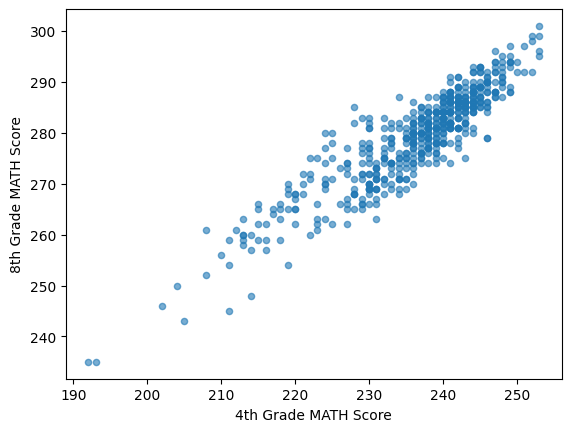

In [196]:
state_data.plot.scatter(x='AVG_MATH_4_SCORE', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('4th Grade MATH Score')
plt.ylabel('8th Grade MATH Score')

**Visualization 1 Observations: It appears that there is a potential strong positive linear correlation between the 4th grade math performance and 8th grade math performance. There is more crowding around x-range between 230 and 250.**

**Visualization 2**

Text(0, 0.5, '8th Grade MATH Score')

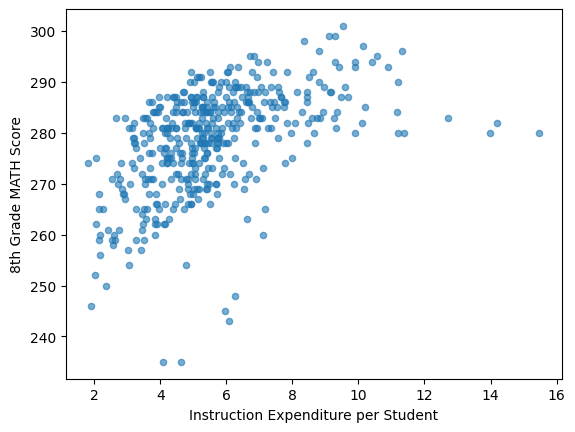

In [197]:
state_data.plot.scatter(x='INSTRUCTION_EXPENDITURE_PER_STUDENT', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Instruction Expenditure per Student')
plt.ylabel('8th Grade MATH Score')

**Visualization 2 Observations: There is a moderate positive assocation between instruction expenditure per student and the 8th grade math performance with a few outliers, especially as the instructure expenditure per student exceeds 10**

**Visualization 3**

Text(0, 0.5, '8th Grade MATH Score')

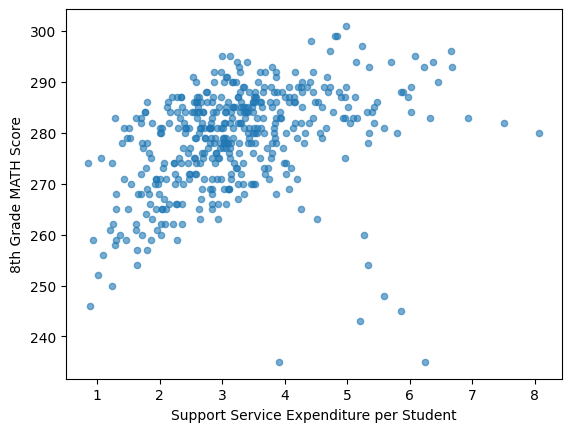

In [215]:
state_data.plot.scatter(x='SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Support Service Expenditure per Student')
plt.ylabel('8th Grade MATH Score') 

**Visual 3 Observations: Similar to visualization 2, there also appears to be a moderate positive association between support service expenditure per student and 8th grade math performance. However, graph 3 has more extreme outliers than graph 2.**

<h2> Data Creation </h2>

_Use this space to create train/test data_


In [134]:
from sklearn.model_selection import train_test_split

In [202]:
# It appears all three predictors have moderate to strong correlation to a student's math performance. 
# Thus, I will be chosing these three as my input variables
X = state_data[['INSTRUCTION_EXPENDITURE_PER_STUDENT','SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT','AVG_MATH_4_SCORE']].dropna()
y = state_data.loc[X.index]['AVG_MATH_8_SCORE']


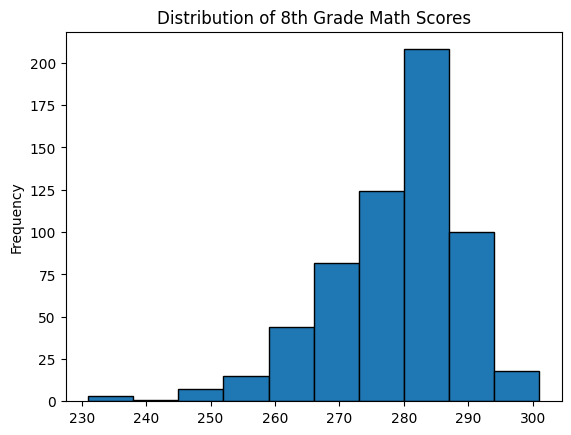

In [219]:
state_data.AVG_MATH_8_SCORE.plot.hist(title="Distribution of 8th Grade Math Scores", edgecolor="black")
# the distribution appears to be left skewed, ultimately affect the mean. Therefore, the median may be a better represenative of the data
y.fillna(y.mean(), inplace=True)

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [221]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [222]:
# create your model here
model = LinearRegression()

In [223]:
model.fit(X_train, y_train)

LinearRegression()

In [224]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [234]:
# finding the exact intercepts and coefficients the model generates
print(model.intercept_)
print(model.coef_)
# R^2 assess how well the linear model fits with the data, ranging from 0-1. 
print(model.score(X_test, y_test))
# mean error
print(np.mean(model.predict(X_test)-y_test))
# root mean squared error -- penalizes large errors. 
print(np.mean((model.predict(X_test)-y_test)**2)**0.5)

57.65194400119947
[ 0.52328708 -1.31458048  0.94402247]
0.8776879687786535
0.038649782823224725
4.0354382295601425


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior on Testing Set')

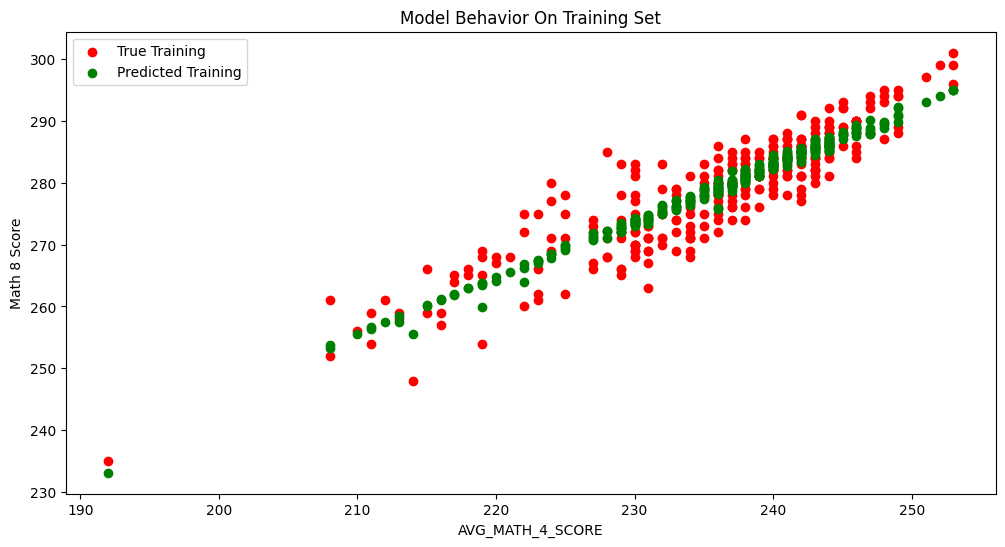

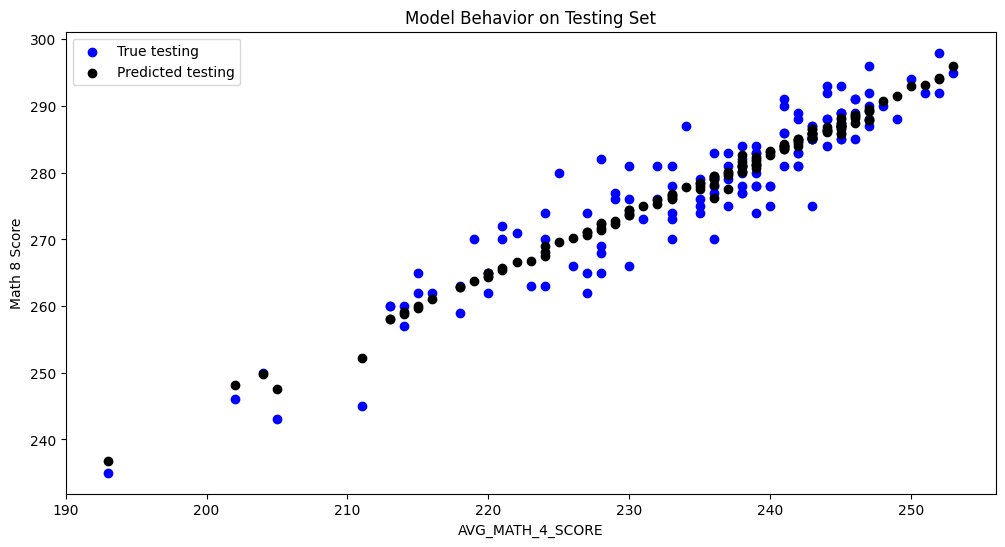

In [235]:
col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 8 Score')
plt.title("Model Behavior On Training Set")

col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 8 Score')
plt.title("Model Behavior on Testing Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

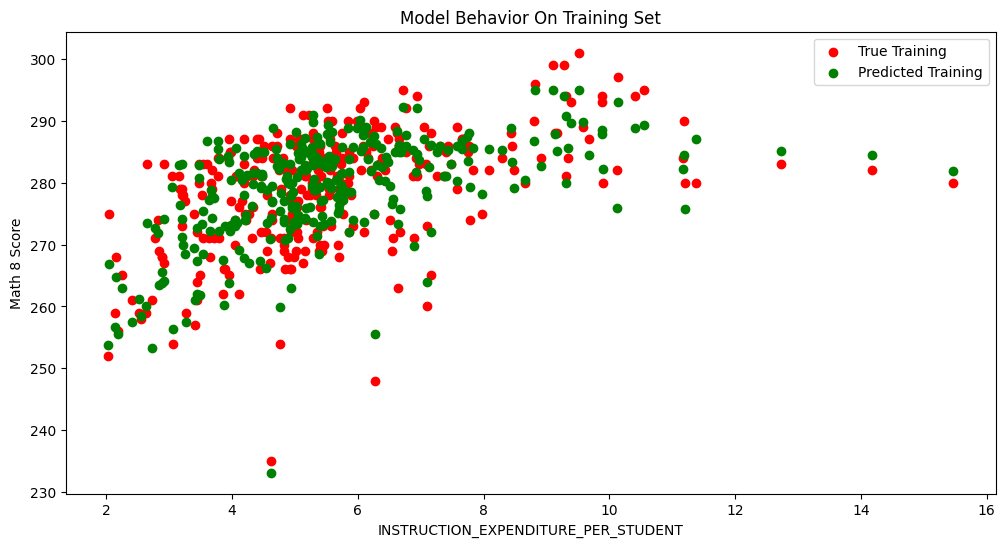

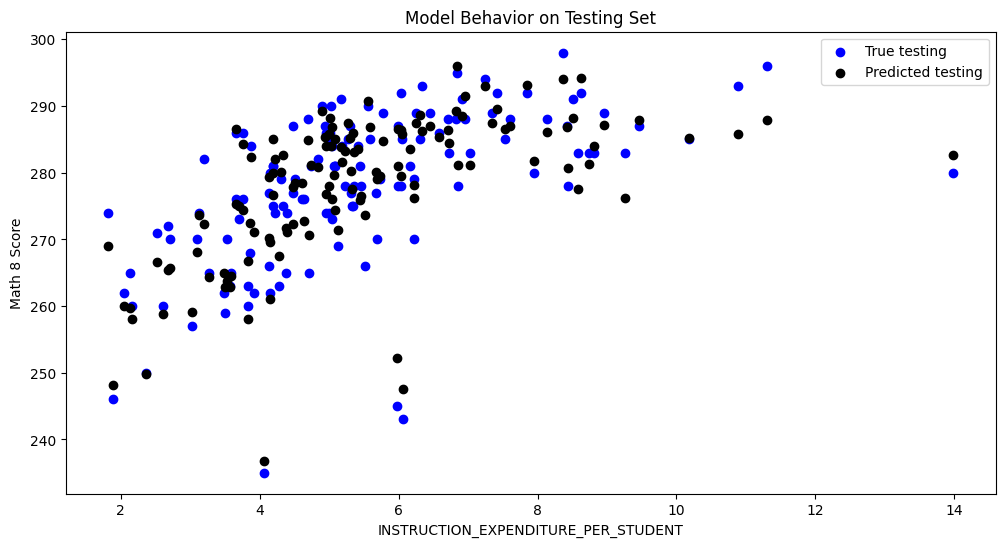

In [236]:
col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 8 Score')
plt.title("Model Behavior On Training Set")

col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 8 Score')
plt.title("Model Behavior on Testing Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

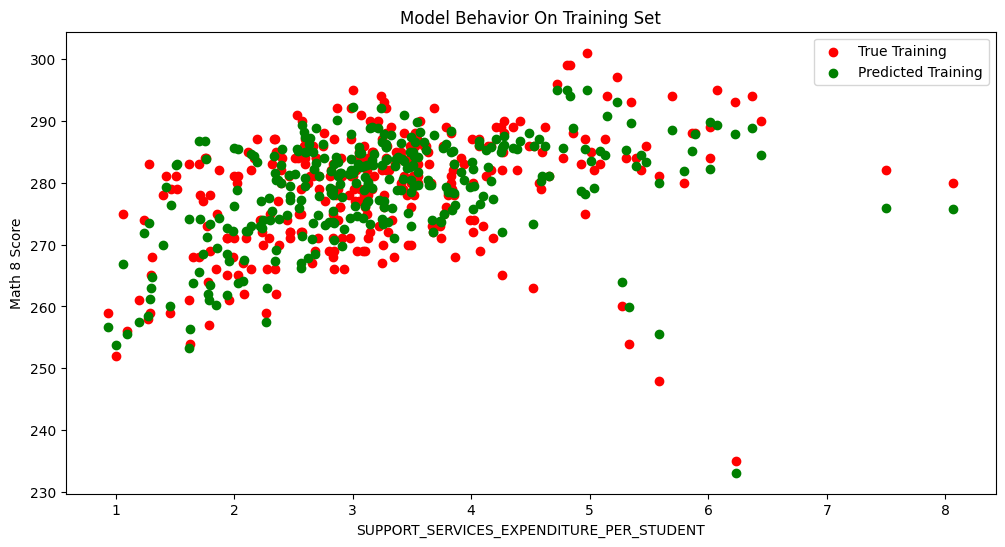

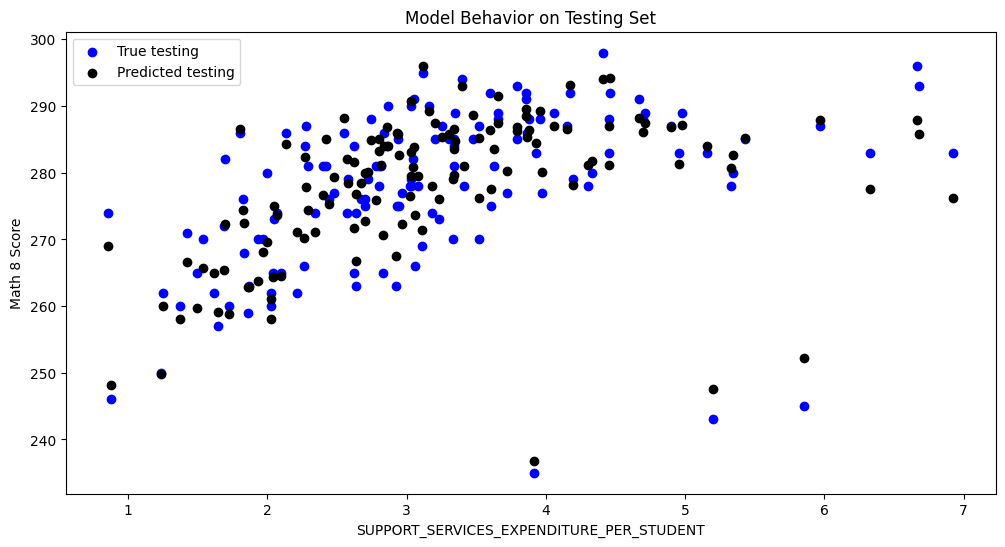

In [237]:
col_name = 'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 8 Score')
plt.title("Model Behavior On Training Set")

col_name = 'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 8 Score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**For this project, I aimed to focus on Grade 8 math scores as a specific response variable. I explored the years of data logged for my variable; in addition, I also compared how the average Grade 8 Math scores differed among each states. For the features, I chosed to asses Grade 4 math scores, instructional expenditure per student, and support service expenditure per student, specifically how it is in relation to analyzing the grade 8 math scores. Using the sklearn module and the features, I created a least squares linear regression model to predict my chosen response variable. In terms of the performance, the linear model data has a moderately strong R^2 value of roughly 0.8777 and a mean error of approximately 0.0386. In addition, the model behavior graphs also indicates that the model performs fairly well with both the training and testing set for all predictors. Conclusively, when assessing Grade 8 math performance, it is best to look into the Grade 4 math performance as well. The investment in instruction and support services per student might also be possible indicators of a student's math performance.**